In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Montamos nuestro disco de Google Drive
drive.mount("/content/drive", force_remount=True)

---

#**Bloque I**: Filtros Paso Bajo

- Aprenderemos a realizar filtros paso bajo en el dominio del espacio (Filtrado Espacial. Filtros Paso Bajo)


---

##**Ejemplo I.1**: Convolución

- leemos la imagen numeros.png
- creamos distintas máscaras de convolución
- utilizamos la función *cv2.filter2D* para realizar la convolución de la imagen numeros.png con cada una de las máscaras de convolución creadas anteriormente

La función *cv2.filter2D* tiene 3 parámetros de entrada:

    Src – La imagen de entrada sobre la que se aplica el filtro de convolución
    Ddepth – Profundidad de la imagen de salida (-1 dará a la imagen de salida la misma profundidad que la imagen de entrada)
    Kernel – La matriz 2D con la que queremos convolucionar la imagen de entrada

**Nota**: la profundidad de una images es el número de bits necesarios para codificar y guardar la información (el valor) de cada píxel en una imagen

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'numeros.png'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Creamos las 3 máscaras de convolución de este ejemplo
# Máscara de la media
media = np.ones((5,5), np.float32)/25

# Máscara gaussiana
gaussiana = np.array(([1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7],
	[4, 16, 26, 16, 4], [1, 4, 7, 4, 1]), np.float32)
gaussiana = gaussiana / np.sum(gaussiana)

# Máscara de relieve
relieve = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
])

# Aplicamos las distintas convoluciones
res1 = cv2.filter2D(img, -1, media)
res2 = cv2.filter2D(img, -1, gaussiana)
res3 = cv2.filter2D(img, -1, relieve)

# Mostramos la imagen original y os resultados de aplicar las distintas máscaras
plt.subplot(221), plt.title('Original'), plt.axis("off")
plt.imshow(img, "gray")
plt.subplot(222), plt.title('Media 5x5'), plt.axis("off")
plt.imshow(res1, "gray")
plt.subplot(223), plt.title('Gaussiana 5x5'), plt.axis("off")
plt.imshow(res2, "gray")
plt.subplot(224), plt.title('Relieve 3x3'), plt.axis("off")
plt.imshow(res3, "gray")
plt.show()

---

##**Ejemplo I.2**: Suavizado o Difuminado (*Blurring*)

- Suavizado Gaussiano

La función *cv.GaussianBlur* requiere una imagen de entrada sobre la que realizar el suavizado, el tamaño de la máscara gaussiana a emplear (en este caso 7x) y también se deberían especificar la desviación estándar en las direcciones X e Y. Si sólos se especifica sigmaX, sigmaY toma el mismo valor que sigma X, y si pone un cero ambos valores se calculan a partir del tamaño de la máscara indicada.Este método es efectivo para eliminar el ruido gaussiano de una imagen.

- Suavizado con la Mediana

Este método es efectivo para eliminar el ruido tipo "sal y pimienta" (*salt and pepper*) de una imagen.

- Suavizado Bilateral

Este método es muy eficaz para eliminar el ruido y al mismo tiempo mantener los bordes perfilados pero el funcionamiento es más lento en comparación con otros filtros. El filtrado gaussian no considera si los píxeles tienen casi la misma intensidad. Tampoco considera si un píxel es un píxel de borde o no. Entonces también difumina los bordes, lo cual no queremos hacer.

Este filtrado bilateral garantiza que sólo se consideren para el desenfoque aquellos píxeles con intensidades similares a las del píxel central. Por lo tanto, preserva los bordes ya que los píxeles en los bordes tendrán una gran variación de intensidad. Además de la imagen, tiene los siguientes parámetros

    d: Diámetro de cada vecindad de píxeles
    sigmaColor: Valor de sigma en el espacio de color. Cuanto mayor sea el valor, los colores más alejados entre sí comenzarán a mezclarse
    sigmaSpace: Valor de sigma en el espacio de coordenadas. Cuanto mayor sea su valor, más píxeles se mezclarán, dado que sus colores se encuentran dentro del rango sigmaColor

---


In [ ]:
# Suavizado Gaussiano
gausiano = cv2.GaussianBlur(img, (7, 7), 0)

# Suavizado con la Mediana
mediana = cv2.medianBlur(img, 5)

# Suavizado Bilateral
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# Mostramos la imagen original y os resultados de aplicar los distintos suavizados
plt.subplot(221), plt.title('Original'), plt.axis("off")
plt.imshow(img, "gray")
plt.subplot(222), plt.title('Suavizado gaussiano'), plt.axis("off")
plt.imshow(gausiano, "gray")
plt.subplot(223), plt.title('Suavizado mediana'), plt.axis("off")
plt.imshow(mediana, "gray")
plt.subplot(224), plt.title('Suavizado bilateral'), plt.axis("off")
plt.imshow(bilateral, "gray")
plt.show()

---

##**Ejemplo I.3**: Aumentar contraste o nitided (Sharp)

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'rueda.bmp'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Definimos distintas máscaras de convolución para aumentar contraste
m1 = np.array([
  [ 0, -1,  0],
  [-1,  5, -1],
  [ 0, -1,  0]
])

res1 = cv2.filter2D(img, -1, m1)

m2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
res2 = cv2.filter2D(img, -1, m2)

m3 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 1]], np.float32)
m3 = 1/3 * m3
res3 = cv2.filter2D(img, -1, m3)

# Mostramos la imagen original y los resultados de aplicar las distintas convoluciones
plt.subplot(221), plt.title('original'), plt.axis("off")
plt.imshow(img, "gray")
plt.subplot(222), plt.title('m1'), plt.axis("off")
plt.imshow(res1, "gray")
plt.subplot(223), plt.title('m2'), plt.axis("off")
plt.imshow(res2, "gray")
plt.subplot(224), plt.title('m3'), plt.axis("off")
plt.imshow(res3, "gray")
plt.show()

---

##**Ejemplo I.4**: Perfilar bordes

En relación con el ejercicio anterior, los bordes de una imagen digital se pueden perfilar mediante un enfoque simple conocido como enmascaramiento de enfoque, donde una versión desenfocada o suavizada de una imagen se resta de la imagen original.

En el siguiente ejemplo, primero se aplica un filtro de suavizado gaussiano y la imagen resultante se resta de la imagen original.

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'sudoku.jpg'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Aplicamos los filtros para perfilar la imagen
suavizada = cv2.GaussianBlur(img, (9, 9), 10)
perfilada = cv2.addWeighted(img, 2.0, suavizada, -1.0, 0)

# Mostramos la imagen original y la perfilada
plt.subplot(121), plt.title('original'), plt.axis("off")
plt.imshow(img, "gray")
plt.subplot(122), plt.title('perfilada'), plt.axis("off")
plt.imshow(perfilada, "gray")
plt.show()

---

#**EJERCICIO 1**: Implementar el filtro de la mediana

**Enunciado**:

- Abrir la imagen numeros.png
- Implementar el filtro de la mediana (sin utilizar ninguna función de OpenCV)
- Utilizar cv2.medianBlur para obtener el resultado del filtro de la mediana con OpenCV
- Comprobar que ambos procesos dan el mismo resultado (restando ambas imágenes entre sí y comprobando que el resto es cero para todos sus píxeles)

---


---

#**EJERCICIO 2**: Implementar el filtro de la mediana con umbral

**Enunciado**:

- Abrir la imagen numeros.png
- Implementar el filtro de la mediana con umbral (sin utilizar ninguna función de OpenCV)
- Probar con distintos valores de umbral
- Comparar los resultados del filtro de la mediana con los del filtro con la mediana con umbral

---


---

#**Bloque II**: Filtros Paso Alto

- Aprenderemos a realizar filtros paso alto en el dominio del espacio (Filtrado Espacial. Filtros Paso Alto)



---

##**Ejemplo II.1**: Gradiente de Sobel

Gradiente en X:

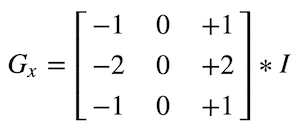

Gradiente en Y:

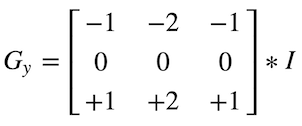

Cálculo del Gradiente:

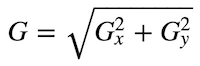

o:

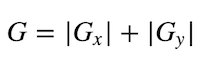

---


In [ ]:
# si ksize = -1 Sobel emplea las máscaras de Scharr y
# con ksize = 3, 5, 7... emplea las máscaras de Sobel
ksize = 3

gX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# la magnitud de los gradientes se de devuelve en coma flotante (float)
# por lo que devemos convertirla a unsigned 8-bit integer
# para poder visualizarla
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combinamos las imágenes de gradiente en una única imagen
combinada = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# Visualizamos los resultados
plt.subplot(221), plt.title('original'), plt.axis("off")
plt.imshow(img, 'gray')
plt.subplot(222), plt.title('Gx'), plt.axis("off")
plt.imshow(gX, 'gray')
plt.subplot(223), plt.title('Gy'), plt.axis("off")
plt.imshow(gY, 'gray')
plt.subplot(224), plt.title('Resultado'), plt.axis("off")
plt.imshow(combinada, 'gray')
plt.show()

---

##**Ejemplo II.2**: Gradiente de Scharr

Cuando el tamaño de la máscara de Sobel es 3 puede producir imprecisiones notables (después de todo, Sobel sólo es una aproximación de la derivada). OpenCV soluciona esta inexactitud para núcleos de tamaño 3 mediante el uso de la función Scharr(). Esto es tan rápido pero más preciso que la función estándar de Sobel.

Gradientes en X e Y:

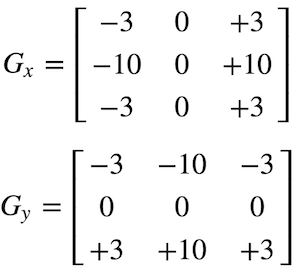

---


In [ ]:
# Obtenemos los dos gradientes y los combinamos
scharr_X = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_X_abs = np.uint8(np.absolute(scharr_X))

scharr_Y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr_Y_abs = np.uint8(np.absolute(scharr_Y))

scharr_XY_combined = cv2.bitwise_or(scharr_Y_abs, scharr_X_abs)

# Visualizamos los resultados
plt.subplot(221), plt.title('original'), plt.axis("off")
plt.imshow(img, 'gray')
plt.subplot(222), plt.title('Gx'), plt.axis("off")
plt.imshow(scharr_X_abs, 'gray')
plt.subplot(223), plt.title('Gy'), plt.axis("off")
plt.imshow(scharr_Y_abs, 'gray')
plt.subplot(224), plt.title('Resultado'), plt.axis("off")
plt.imshow(scharr_XY_combined, 'gray')
plt.show()

---

##**Ejemplo II.3**: Laplaciana

- abrimos la imagen numeros.png
- aplicamos un filtro gaussiano para eliminar ruido
- aplicamos 3 formas de hacer una laplaciana (2 de ellas construyendo las máscaras de convolución de la laplaciana vistas en clase de teoría y la tercera aplicando la función cv2.Laplacian de OpenCV)
- Aplicamos algunas transformaciones de los resultados para que se puedan visualizar

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'numeros.png'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Aplicamos un suavizado gaussiano
img = cv2.GaussianBlur(img,(13,13),0)

# Creamos dos máscaras laplacianas
laplaciana1 = np.array([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0]
])

laplaciana2 = np.array([
  [1, 1, 1],
  [1, -8, 1],
  [1, 1, 1]
])

# Aplicamos las dos convoluciones
res1 = cv2.filter2D(img, -1, laplaciana1)
res1 = cv2.equalizeHist(res1)

res2 = cv2.filter2D(img, -1, laplaciana2)
res2 = cv2.equalizeHist(res2)

# Aplicamos la función Laplacian de OpenCV
res3 = cv2.Laplacian(img, cv2.CV_64F)
res3 = res3 / res3.max()

# Visualizamos los resultados
plt.subplot(221), plt.title('Original'), plt.axis("off")
plt.imshow(img, "gray")
plt.subplot(222), plt.title('M1'), plt.axis("off")
plt.imshow(res1, "gray")
plt.subplot(223), plt.title('M2'), plt.axis("off")
plt.imshow(res2, "gray")
plt.subplot(224), plt.title('Laplaciana'), plt.axis("off")
plt.imshow(res3, "gray")
plt.show()

---

#**EJERCICO 3**: Convoluciones direccionales específicas

**Enunciado**:

implementar las 4 convoluciones direccionales específicas vistas en teoría (O-E, N-S, SO-NE, NO-SE)

O_E = [ [-1, -1, -1], [ 2,  2,  2], [ -1,  -1,  -1] ]

...

**Comentarios**:

las imágenes resultantes son muy oscuras y si se quieren visualizar mejor se puede hacer una ecualización del histograma después de haber aplicado el filtro correspondiente.

---


---

#**EJERCICIO 4**: Implementar el gradiente de Sobel

**Enunciado**:

- Implementar el filtro de Sobel (sin utilizar ninguna función de OpenCV)

- Utilizar cv2.Sobel para obtener el resultado del gradiente de Sobel con OpenCV

- Comprobar que ambos procesos dan el mismo resultado (restando ambas imágenes entre sí y comprobando que el resto es cero para todos sus píxeles)

---


---

#**EJERCICIO 5**: Preproceso completo para la correcta segmentación de las casillas de un sudoku

**Enunciado**:

Abrir la imagen sudoku.jpg y aplicar transformaciones de preproceso para filtrar ruido, eliminar sombras, transformar perspectivas, resaltar información útil... con el objetivo de dejar la imagen preparada para el posterior proceso de reconocimiento de segmentación de las casillas del sudoku a resolver.

---